In [ ]:
import tensorflow as tf
print("TF Version:", tf.__version__)
import tensorflow_hub as hub
print("TF hub Version:", hub.__version__)
print("GPU", "availabe" if tf.config.list_physical_devices("GPU") else "not availabe")

TF Version: 2.6.0
TF hub Version: 0.12.0
GPU availabe


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7908686101357882319, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14512029696
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14629708595988763983
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
import os 
import numpy as np
np.random.seed(777)
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.backend as k


from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

In [ ]:
train_dir = '/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Train'
test_dir = '/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Test'

In [ ]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))
print("-"*70)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Train 0
/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Train/Below Best 1230
/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Train/Best 1409
/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Train/Poor 1469
----------------------------------------------------------------------
/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Test 0
/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Test/Poor 368
/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Test/Below Best 308
/content/drive/MyDrive/Tea Omdena/Withered V.1 80-20/Test/Best 353


In [ ]:
output_classes = 3
batch_size = 32
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)
epochs = 20
nb_train_samples = 4108
nb_test_samples = 1029

In [ ]:
random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 4108 images belonging to 3 classes.
Found 1029 images belonging to 3 classes.


## **VGG16**

In [ ]:
from keras.models import Sequential
model = Sequential()

model.add(VGG16(weights = "imagenet", include_top=False, pooling = 'avg'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation='softmax'))
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

model.layers[0].trainable = True

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1539      
Total params: 14,716,227
Trainable params: 14,716,227
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch = nb_train_samples // batch_size,
  epochs = epochs,
  validation_data = test_generator,
  validation_steps = nb_test_samples // batch_size)

Epoch 1/20
128/128 [==============================] - 2126s 16s/step - loss: 0.8954 - accuracy: 0.5746 - val_loss: 0.6394 - val_accuracy: 0.7227
Epoch 2/20
128/128 [==============================] - 147s 1s/step - loss: 0.6323 - accuracy: 0.7306 - val_loss: 0.5520 - val_accuracy: 0.7627
Epoch 3/20
128/128 [==============================] - 146s 1s/step - loss: 0.4973 - accuracy: 0.8020 - val_loss: 0.4833 - val_accuracy: 0.7969
Epoch 4/20
128/128 [==============================] - 146s 1s/step - loss: 0.3742 - accuracy: 0.8516 - val_loss: 0.4120 - val_accuracy: 0.8418
Epoch 5/20
128/128 [==============================] - 144s 1s/step - loss: 0.2962 - accuracy: 0.8817 - val_loss: 0.3607 - val_accuracy: 0.8574
Epoch 6/20
128/128 [==============================] - 145s 1s/step - loss: 0.2318 - accuracy: 0.9102 - val_loss: 0.2917 - val_accuracy: 0.8867
Epoch 7/20
128/128 [==============================] - 144s 1s/step - loss: 0.1747 - accuracy: 0.9345 - val_loss: 0.3029 - val_accuracy: 0.89

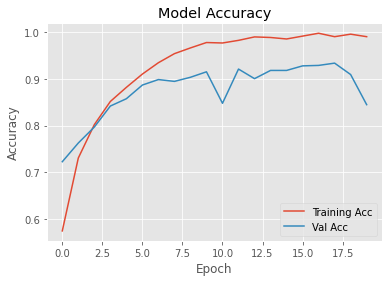

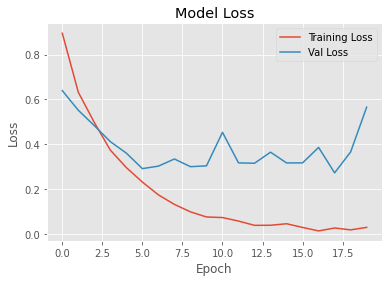

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Val Acc'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Val Loss'], loc='upper right')
plt.show()

In [ ]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

32/32 [==============================] - 27s 852ms/step
No of errors = 159/1029


Confusion Matrix
[[184  91  33]
 [  0 350   3]
 [ 15  17 336]]


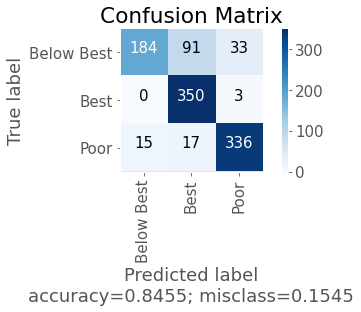

<Figure size 2160x2160 with 0 Axes>

In [ ]:
from sklearn import preprocessing
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass)) 
    plt.figure(figsize=(30,30))


plot_confusion_matrix(cm, classes=labels,
                      title='Confusion Matrix')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Below Best       0.92      0.60      0.73       308
        Best       0.76      0.99      0.86       353
        Poor       0.90      0.91      0.91       368

    accuracy                           0.85      1029
   macro avg       0.86      0.83      0.83      1029
weighted avg       0.86      0.85      0.84      1029



In [ ]:
model.save('/content/drive/MyDrive/Tea Omdena/Models/VGG16-tea-Withered-model(v1).h5')
model.save_weights('/content/drive/MyDrive/Tea Omdena/Models/VGG16-tea-Withered-Weights(v1).h5')

## **VGG19**

In [ ]:
from keras.applications.vgg19 import VGG19
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
model = Sequential()

model.add(VGG19(weights = "imagenet", include_top=False, pooling = 'avg'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation='softmax'))

model.layers[0].trainable = True

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 20,025,923
Trainable params: 20,025,923
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch = nb_train_samples // batch_size,
  epochs = epochs,
  validation_data = test_generator,
  validation_steps = nb_test_samples // batch_size)

Epoch 1/20
128/128 [==============================] - 151s 1s/step - loss: 1.0994 - accuracy: 0.4502 - val_loss: 0.7808 - val_accuracy: 0.6650
Epoch 2/20
128/128 [==============================] - 149s 1s/step - loss: 0.7490 - accuracy: 0.6742 - val_loss: 0.6265 - val_accuracy: 0.7295
Epoch 3/20
128/128 [==============================] - 150s 1s/step - loss: 0.5735 - accuracy: 0.7632 - val_loss: 0.5612 - val_accuracy: 0.7646
Epoch 4/20
128/128 [==============================] - 149s 1s/step - loss: 0.4168 - accuracy: 0.8391 - val_loss: 0.4341 - val_accuracy: 0.8281
Epoch 5/20
128/128 [==============================] - 149s 1s/step - loss: 0.3105 - accuracy: 0.8815 - val_loss: 0.4425 - val_accuracy: 0.8203
Epoch 6/20
128/128 [==============================] - 149s 1s/step - loss: 0.2539 - accuracy: 0.9075 - val_loss: 0.4032 - val_accuracy: 0.8506
Epoch 7/20
128/128 [==============================] - 153s 1s/step - loss: 0.1960 - accuracy: 0.9284 - val_loss: 0.3938 - val_accuracy: 0.8721

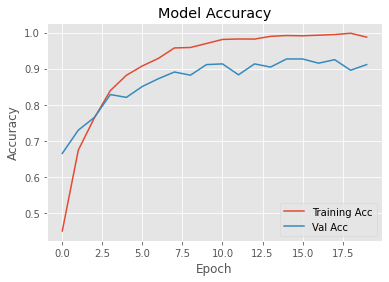

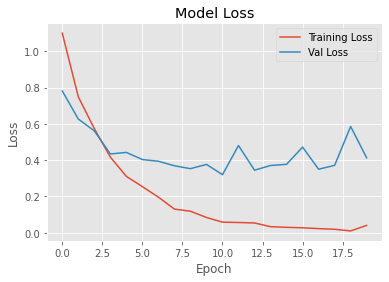

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Val Acc'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Val Loss'], loc='upper right')
plt.show()

In [ ]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

32/32 [==============================] - 26s 814ms/step
No of errors = 92/1029


Confusion Matrix
[[273  17  18]
 [ 10 342   1]
 [ 42   4 322]]


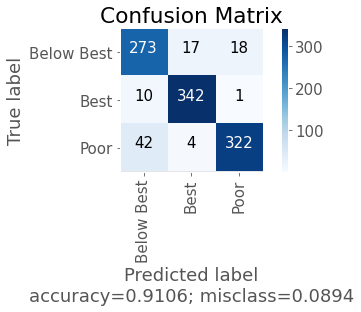

<Figure size 2160x2160 with 0 Axes>

In [ ]:
from sklearn import preprocessing
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass)) 
    plt.figure(figsize=(30,30))


plot_confusion_matrix(cm, classes=labels,
                      title='Confusion Matrix')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Below Best       0.84      0.89      0.86       308
        Best       0.94      0.97      0.96       353
        Poor       0.94      0.88      0.91       368

    accuracy                           0.91      1029
   macro avg       0.91      0.91      0.91      1029
weighted avg       0.91      0.91      0.91      1029



In [ ]:
model.save('/content/drive/MyDrive/Tea Omdena/Models/VGG19-tea-Withered-model(v1).h5')
model.save_weights('/content/drive/MyDrive/Tea Omdena/Models/VGG19-tea-Withered-Weights(v1).h5')